In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearningRating_v3.txt',delimiter='|')
df.head(5)

<ipython-input-3-fb8fd9aa785a>:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/MachineLearningRating_v3.txt',delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
# Automatically identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Columns ", numerical_columns)

Numerical Columns  ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']


In [5]:
def calculate_variability(df, numerical_columns):
    """
    Calculate descriptive statistics for variability of numerical features.
    Parameters:
        - df: DataFrame
        - numerical_columns: List of numerical columns to analyze
    Returns:
        - DataFrame with variability measures
    """
    # Identify numerical columns dynamically
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if not numerical_columns:
        print("No numerical columns found.")
        return None

    variability_df = df[numerical_columns].describe().T
    variability_df['variance'] = df[numerical_columns].var()
    variability_df['range'] = variability_df['max'] - variability_df['min']
    return variability_df[['mean', 'std', 'variance', 'range']]

# Variability analysis
variability = calculate_variability(df, numerical_columns)
print("Variability Analysis:\n", variability)

Variability Analysis:
                                   mean           std      variance  \
UnderwrittenCoverID       1.048175e+05  6.329371e+04  4.006094e+09   
PolicyID                  7.956682e+03  5.290039e+03  2.798451e+07   
PostalCode                3.020601e+03  2.649854e+03  7.021728e+06   
mmcode                    5.487770e+07  1.360381e+07  1.850635e+14   
RegistrationYear          2.010225e+03  3.261391e+00  1.063667e+01   
Cylinders                 4.046642e+00  2.940201e-01  8.644783e-02   
cubiccapacity             2.466743e+03  4.428006e+02  1.960724e+05   
kilowatts                 9.720792e+01  1.939326e+01  3.760984e+02   
NumberOfDoors             4.019250e+00  4.683144e-01  2.193184e-01   
CustomValueEstimate       2.255311e+05  5.645157e+05  3.186780e+11   
NumberOfVehiclesInFleet            NaN           NaN           NaN   
SumInsured                6.041727e+05  1.508332e+06  2.275065e+12   
CalculatedPremiumPerTerm  1.178757e+02  3.997017e+02  1.597615e+05 

In [6]:
def review_data_structure(df):
    """
    Review the data structure of the DataFrame.
    Parameters:
        - df: DataFrame
    Returns:
        - Summary of data structure and formatting issues
    """
    summary = {
        "Column Name": [],
        "Dtype": []
    }

    for col in df.columns:
        summary["Column Name"].append(col)
        summary["Dtype"].append(df[col].dtype)
    return pd.DataFrame(summary)

# Data structure review
summary = review_data_structure(df)
print("\nData Structure Review:\n", summary)


Data Structure Review:
                  Column Name    Dtype
0        UnderwrittenCoverID    int64
1                   PolicyID    int64
2           TransactionMonth   object
3            IsVATRegistered     bool
4                Citizenship   object
5                  LegalType   object
6                      Title   object
7                   Language   object
8                       Bank   object
9                AccountType   object
10             MaritalStatus   object
11                    Gender   object
12                   Country   object
13                  Province   object
14                PostalCode    int64
15            MainCrestaZone   object
16             SubCrestaZone   object
17                  ItemType   object
18                    mmcode  float64
19               VehicleType   object
20          RegistrationYear    int64
21                      make   object
22                     Model   object
23                 Cylinders  float64
24             cubiccapac

In [7]:
def handle_missing_values(df, num_strategy="mean", cat_strategy="most_frequent"):
    """
    Handle missing values in numerical and non-numerical columns.
    Parameters:
        - df: DataFrame
        - num_strategy: Strategy for numerical imputation ('mean', 'median', 'most_frequent', 'constant')
        - cat_strategy: Strategy for categorical imputation ('most_frequent', 'constant')
    Returns:
        - DataFrame with imputed values
    """
    # Identify numerical and non-numerical columns
    numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

    # Filter out columns with all missing values
    num_valid_cols = [col for col in numerical_cols if df[col].notna().any()]
    cat_valid_cols = [col for col in categorical_cols if df[col].notna().any()]

    # Warn about columns with all missing values
    num_skipped = [col for col in numerical_cols if col not in num_valid_cols]
    cat_skipped = [col for col in categorical_cols if col not in cat_valid_cols]

    if num_skipped:
        print(f"Skipping numerical columns with all missing values: {num_skipped}")
    if cat_skipped:
        print(f"Skipping categorical columns with all missing values: {cat_skipped}")

    # Impute numerical columns
    if num_valid_cols:
        num_imputer = SimpleImputer(strategy=num_strategy)
        df[num_valid_cols] = num_imputer.fit_transform(df[num_valid_cols])

    # Impute categorical columns
    if cat_valid_cols:
        cat_imputer = SimpleImputer(strategy=cat_strategy)
        df[cat_valid_cols] = cat_imputer.fit_transform(df[cat_valid_cols])

    return df
handle_missing_values(df.head(5))

Skipping numerical columns with all missing values: ['NumberOfVehiclesInFleet']


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249.0,12827.0,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249.0,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249.0,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255.0,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255.0,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520.0,389.0,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520.0,389.0,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520.0,389.0,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519.0,389.0,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


**Univariate Analysis**

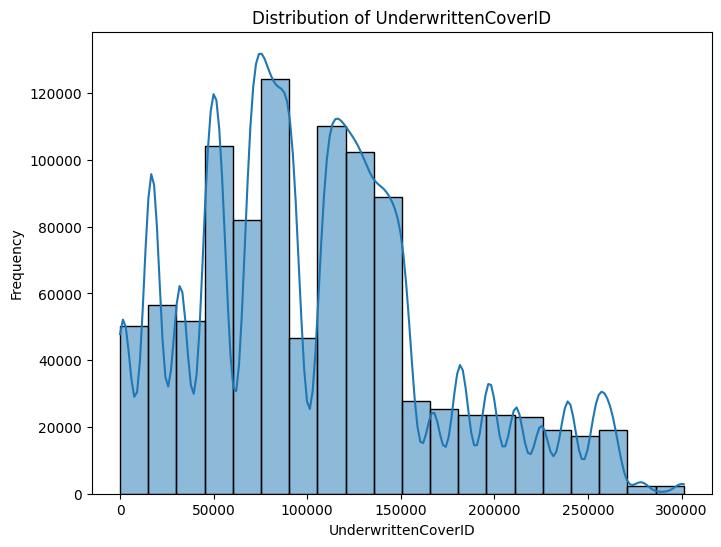

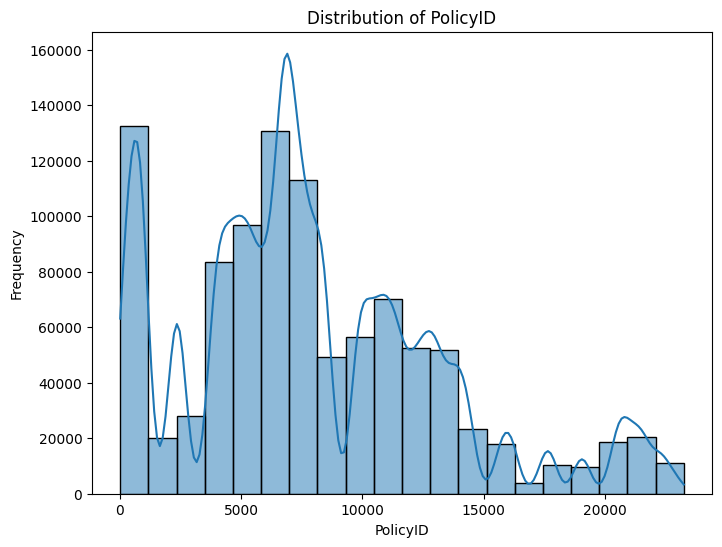

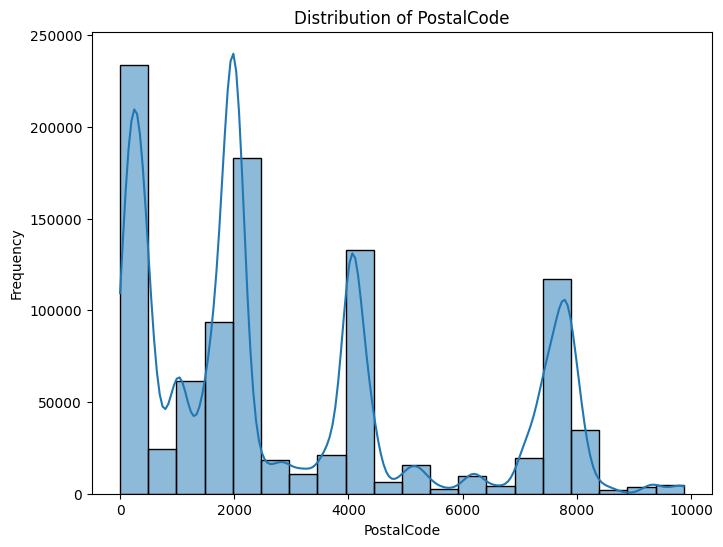

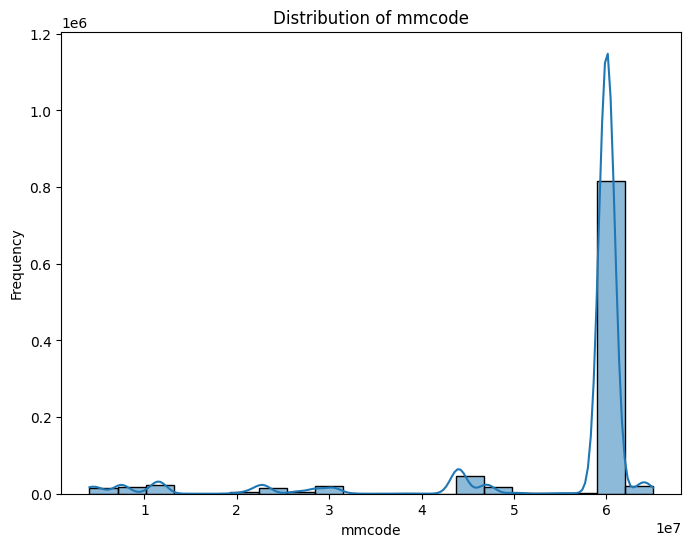

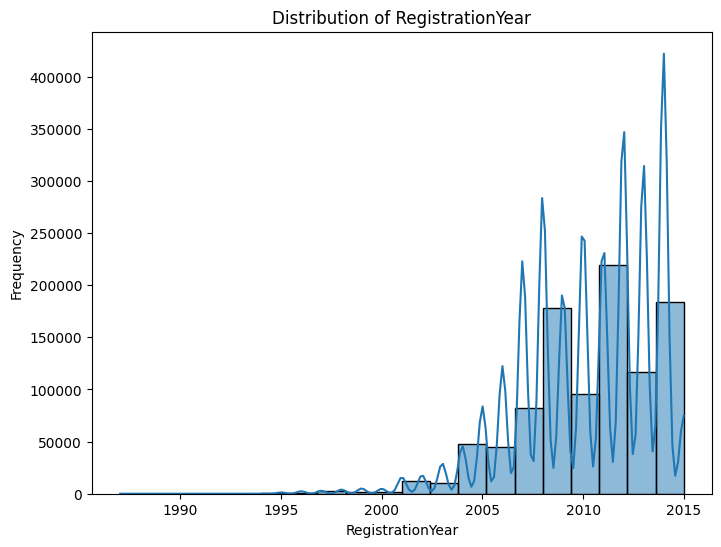

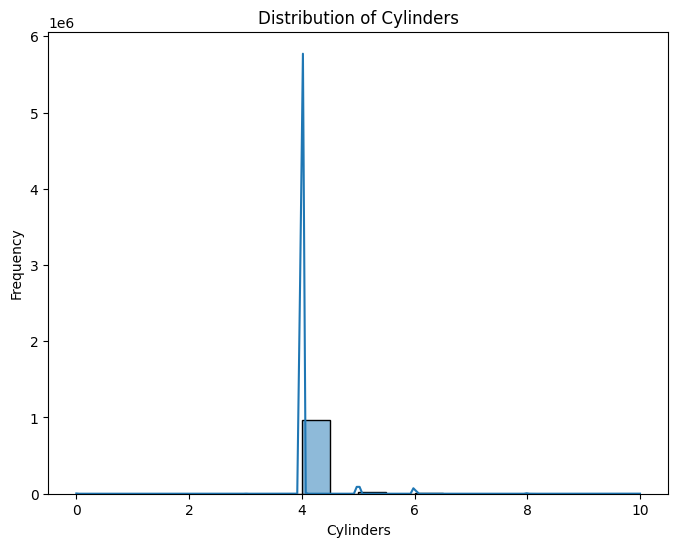

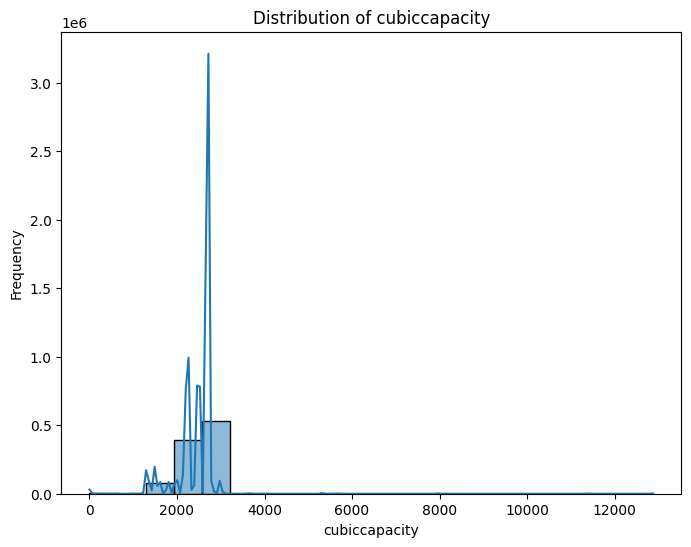

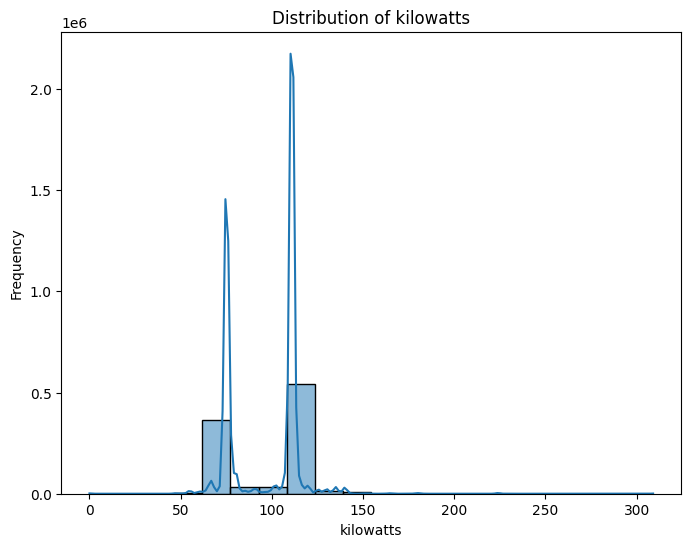

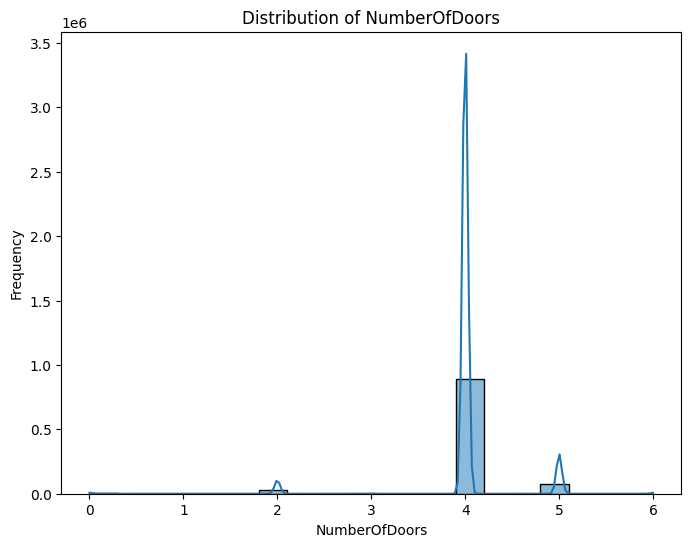

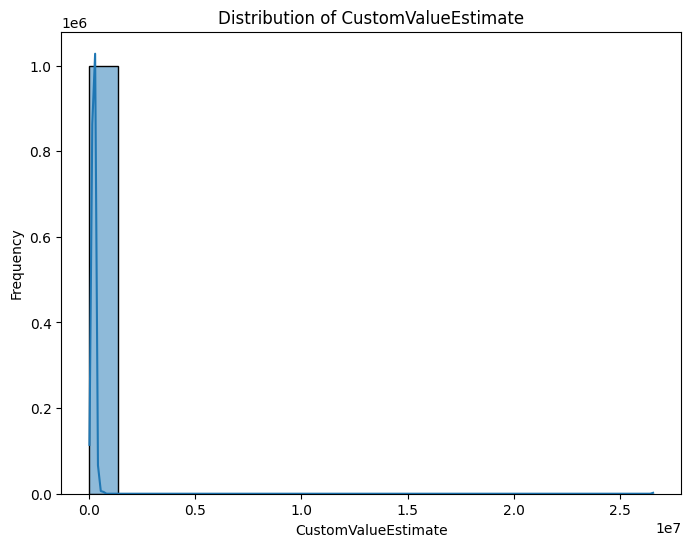

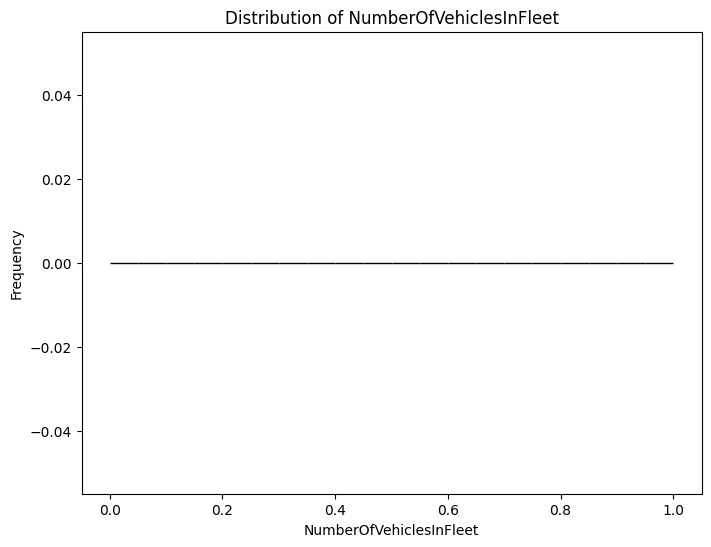

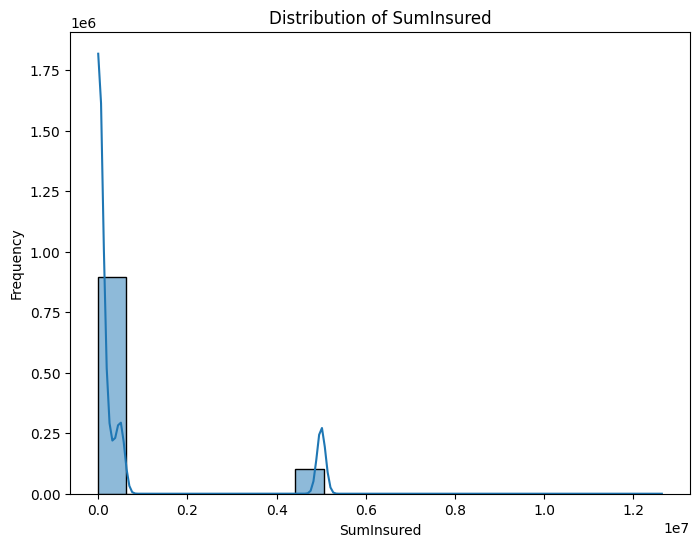

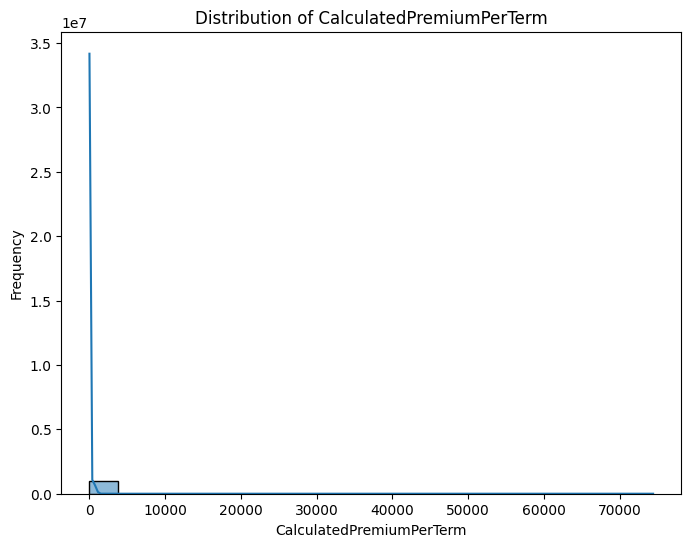

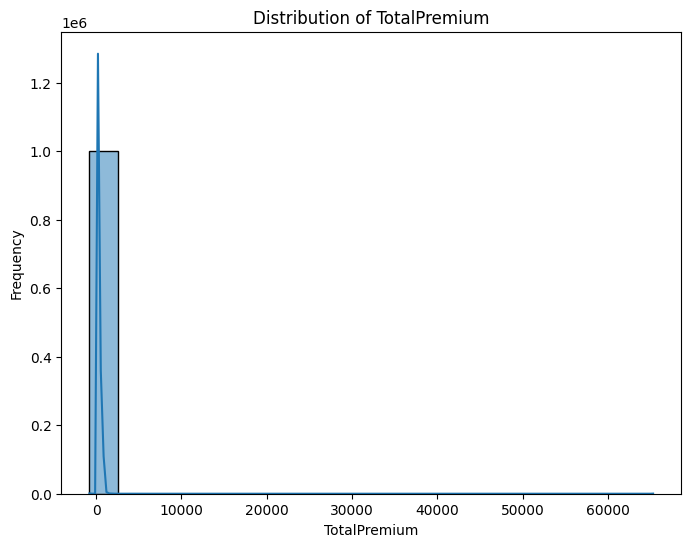

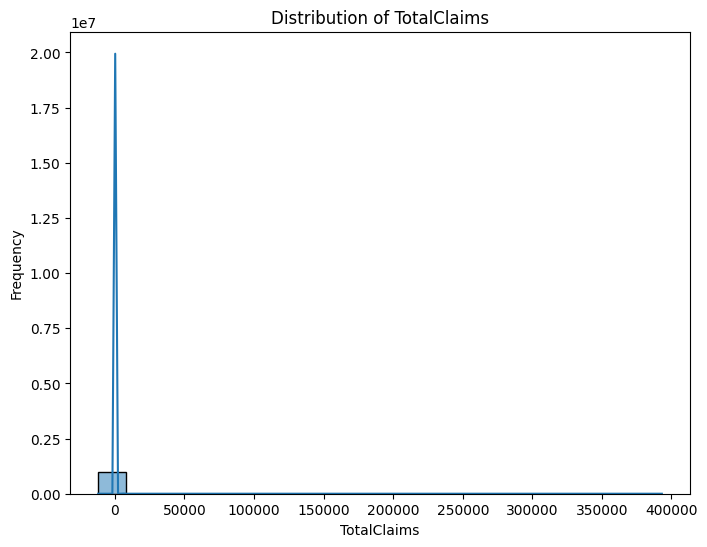

In [8]:
# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Plot bar charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

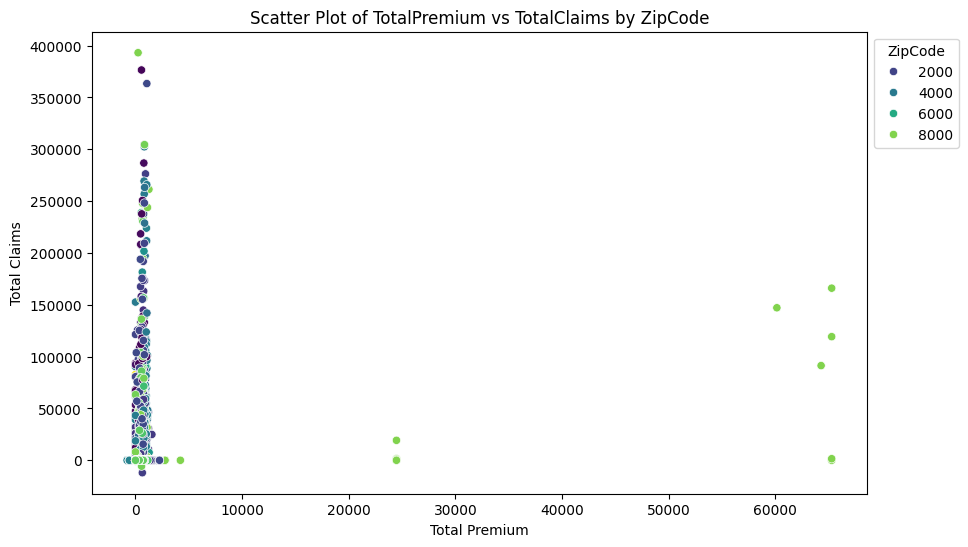

In [ ]:
# relationship between TotalPremium and TotalClaims as a function of ZipCode
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='viridis')
plt.title('Scatter Plot of TotalPremium vs TotalClaims by ZipCode')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='ZipCode', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

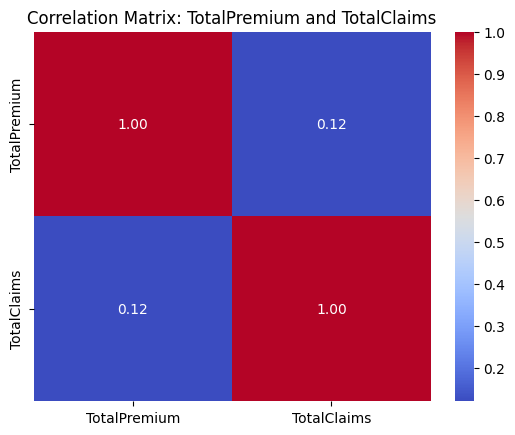

In [11]:
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: TotalPremium and TotalClaims')
plt.show()
